<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/YB_1%EC%A1%B0_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**미니 프로젝트 : 2010년대 영화 산업 현황**
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

- 조건: 변수 2개 이상 연결한 결과값 포함

In [21]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

# **1. 라이브러리 및 데이터 불러오기**
___

In [2]:
from google.colab import drive
drive.mount('/content/drive') #드라이브에 접근해서 파일 가져오기

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' #matplotlib  한글 깨짐 방지

#그래픽 출력 결과를 셀 아래 표시
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/movies_train.csv")

# **2. 탐색적 자료 분석(EDA)**

###**2-1) 데이터 미리보기**

In [1]:
train.head(10)

NameError: ignored

###**2-2) 데이터 확인**

##### **변수 설명**
+ `title` : 영화의 제목
+ `distributor` : 배급사
+ `genre` : 장르
+ `release_time` : 개봉일
+ `time` : 상영시간(분)
+ `screening_rat` : 상영등급
+ `director` : 감독이름
+ `dir_prev_bfnum` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ `dir_prev_num` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ `num_staff` : 스텝수
+ `num_actor` : 주연배우수
+ `box_off_num` : 관객수

In [ ]:
print(train.shape)

(600, 12)


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


###**2-3) 결측치 확인 및 데이터 전처리**

In [ ]:
#결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()) #모두 dir_prev_num이 0이다

0


In [6]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [7]:
#release_time을 int -> datatime 형태로 변환
train['release_time']=pd.to_datetime(train['release_time'])

#**3. 데이터 시각화 및 분석**

##**1) 관객수 분석**

### **1-1) 관객수 - 배급사**

- 사용한 변수:  distributor, box_off_num 

Text(0, 0.5, '배급사 수')

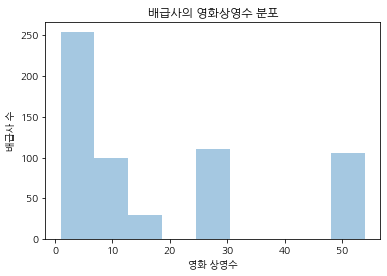

In [ ]:
## 배급사 규모 별 분할 기준 설정

# 배급사의 규모는 상영 영화 수를 기준으로 판단
# 배급사별 상영 영화 수를 dist_aud_movie라는 열 이름으로 train dataframe에 추가
train['dist_aud_movie'] = train.groupby(['distributor'])['distributor'].transform('count') # distributor로 묶어서, distributor의 갯수를 count 해서 transform을 이용해 열 추가. 

ax = plt.subplots()
ax = sns.distplot(train['dist_aud_movie'], kde=False) #dist_aud_movie 에 대한 분포를 나타내준다.
ax.set_title("배급사의 영화상영수 분포")
ax.set_xlabel("영화 상영수")
ax.set_ylabel("배급사 수")

* 위 히스토그램을 통해 배급사의 영화 상영수에 대한 분포가 3개의 봉우리, 즉 3개의 집단으로 나눠어지는 것을 알 수 있다.
* 3개의 집단를 나누는 기준인 영화 상영수 20, 40 을 기준으로 배급사 규모를 분할하였다. 
  1. 소형 배급사 : 영화상영수 0이상 20미만
  2. 중형 배급사 : 영화상영수 20이상 40미만
  3. 대형 배급사 : 영화상영수 40이상

In [ ]:
# 비슷한 빈도수 가질 수 있도록 분할 기준 살펴보기
dist_large = ((train['dist_aud_movie']>=0) & (train['dist_aud_movie']< 20)).sum() #184
dist_med = ((train['dist_aud_movie']>=20) & (train['dist_aud_movie']<40)).sum() #199
dist_small = (train['dist_aud_movie']>=40).sum() #217
print(dist_large, dist_med, dist_small)

# 배급사 규모 분할하여 새로운 변수 생성
condlist = [( train['dist_aud_movie'] >= 40),( train['dist_aud_movie'] < 40) & ( train['dist_aud_movie'] >= 20),( train['dist_aud_movie'] < 20)]
choicelist = ['대형','중형','소형']
train['dist_size'] = np.select(condlist, choicelist)
train.head()

383 111 106


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dist_aud_movie,dist_size
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,52,대형
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,26,중형
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,26,중형
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,30,중형
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2,소형


Text(0, 0.5, '관객수')

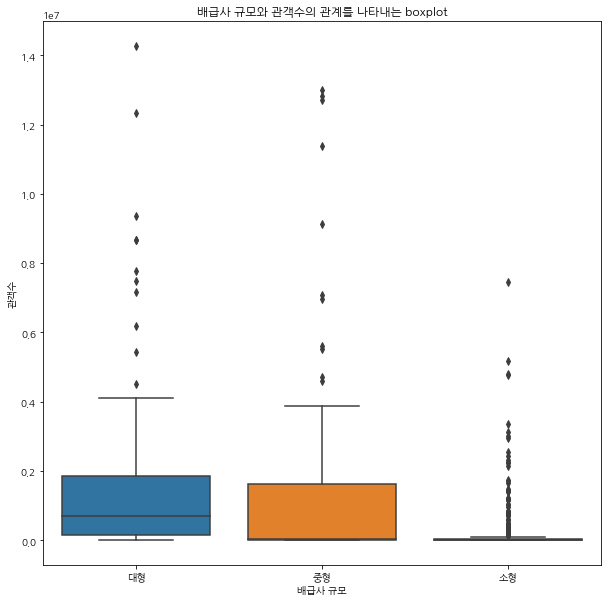

In [ ]:
# 배급사 규모(대형, 중형, 소형)와 관객수의 관계
plt.rcParams['figure.figsize'] = [10, 10]
ax=plt.subplots()
ax=sns.boxplot(x='dist_size',y='box_off_num',data= train,order=['대형','중형','소형'])

#제목 및 라벨 추가
ax.set_title('배급사 규모와 관객수의 관계를 나타내는 boxplot')
ax.set_xlabel('배급사 규모')
ax.set_ylabel('관객수')

##### | 분석 결과
___
- 대형, 중형, 소형 배급사 순으로 관객수가 많다. 
- 대형 배급사와 중형 배급사의 관객수는 비슷하지만, 소형배급사의 관객수는 월등히 작은 것을 확인할 수 있다. 

### **1-2) 관객수 - 장르**


- 사용한 변수:  genre, box_off_num 

In [ ]:
# 장르별 총 관객 수 구하기
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

Text(0, 0.5, '관객수')

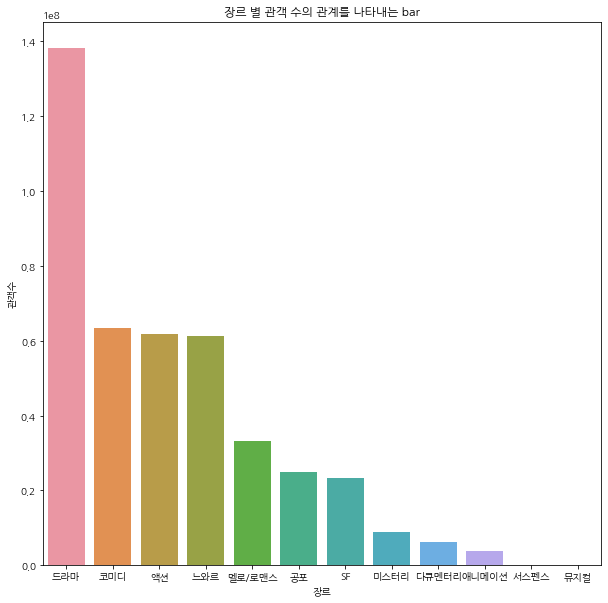

In [ ]:
# 장르별 총 관객 수 bar 플랏
genre_aud = train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)
df = pd.DataFrame(genre_aud)
df["genre"]= df.index #genre 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='genre', y='box_off_num',data = df)

#제목 및 라벨 추가
ax.set_title('장르 별 관객 수의 관계를 나타내는 bar')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

##### | 분석 결과
___
- 드라마, 코미디, 액션, 그리고 느와르 순으로 총 관객 수가 많다. 
- 드라마의 관객수는 코미디, 액션, 느와르 관객수의 2배 이상이라고 할 수 있다. 

### **1-3) 관객수 - 감독유명도**
- 사용한 변수:  dir_prev_bfnum, box_off_num 


In [ ]:
train['유명도']=''
for i in range(len(train)):
  if train['dir_prev_bfnum'][i]==0: 
    train['유명도'][i]='1'
  elif train['dir_prev_bfnum'][i]<100000:
    train['유명도'][i]='2'
  elif train['dir_prev_bfnum'][i]<500000:
    train['유명도'][i]='3'
  elif train['dir_prev_bfnum'][i]<1000000: 
    train['유명도'][i]='4'
  else:
    train['유명도'][i]='5'

train['유명도'].value_counts()

1    330
2     95
5     90
3     46
4     39
Name: 유명도, dtype: int64

* 감독의 전제작 영화에서의 평균 관객수를 기준으로 구간을 나누어 '유명도'라는 변수를 생성했다. 

<Figure size 720x720 with 0 Axes>

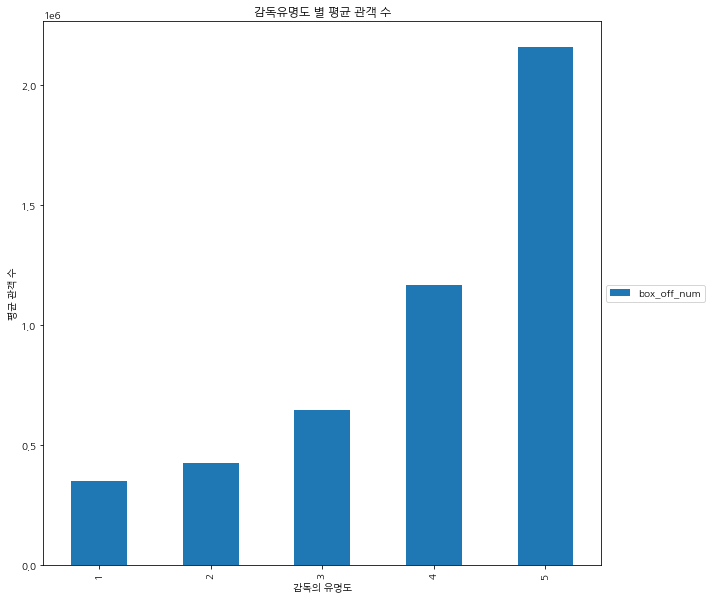

In [ ]:
plt.figure()
train[['box_off_num']].groupby(train['유명도']).mean().plot(kind='bar')

plt.title('감독유명도 별 평균 관객 수')
plt.xlabel('감독의 유명도')
plt.ylabel('평균 관객 수')
#범례 위치
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
aaa = train[['box_off_num']].groupby(train['유명도']).mean().reset_index()
aaa.columns = ['유명도', '평균관객수']
aaa

#상관관계 검정 (감독의 유명도:범주형 변수/평균 관객 수:연속형 변수) => 비모수 검정 (스피어만)
import pingouin as pg
pg.corr(aaa.유명도.astype(int), aaa.평균관객수, method="spearman")

,n,r,CI95%,p-val,power
spearman,5,1.0,"[1.0, 1.0]",1.404265e-24,1.0


##### | 분석 결과
___
* 감독의 전제작 영화에서의 평균 관객수가 많을수록, 즉 유명도가 높을수록 현제작 영화의 평균 관객수가 많았다. 
* 스피어만 상관관계 계수가 1로, 두 변수의 양의 상관관계가 매우 확실하다.  
* p-value가 매우 작고 95% 신뢰구간 [1.0, 1.0]안에 r=1이 포함되므로, 두 변수 사이의 관계가 매우 유의하다고 할 수 있다.  

**감독의 유명도 별 평균 관객수에 대한 박스플랏 생성**

In [ ]:
# 감독의 유명도 분할하여 새로운 변수 생성
condlist = [(train['dir_prev_bfnum']>= 1000000),(train['dir_prev_bfnum'] < 1000000) & (train['dir_prev_bfnum']>= 500000), (train['dir_prev_bfnum'] < 500000) & (train['dir_prev_bfnum']>= 100000), (train['dir_prev_bfnum'] < 1000000) & (train['dir_prev_bfnum']> 0),(train['dir_prev_bfnum']==0)]
choicelist = ['5','4','3','2','1']
train['prev_size'] = np.select(condlist, choicelist)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dist_aud_movie,dist_size,유명도,prev_size
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,52,대형,1,1
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,26,중형,5,5
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,26,중형,3,3
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,30,중형,2,2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2,소형,2,2


Text(0, 0.5, '관객수')

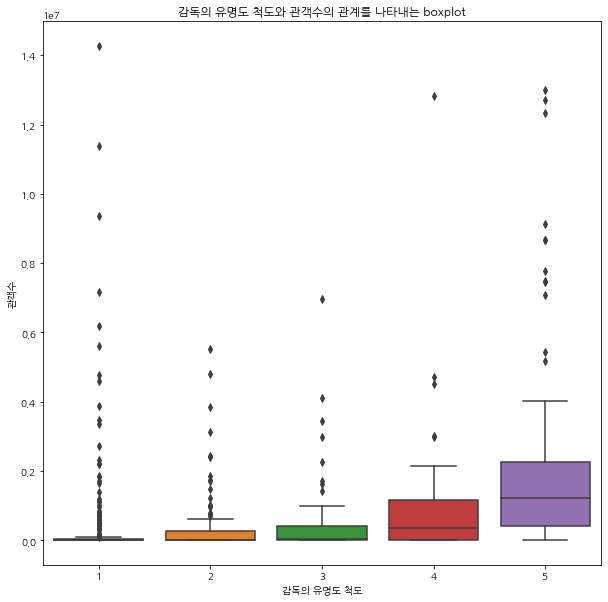

In [ ]:
# 감독의 유명도 척도와 관객수의 관계 박스플랏으로 표현
plt.rcParams['figure.figsize'] = [10, 10]
bx=plt.subplots()
bx=sns.boxplot(x='prev_size',y='box_off_num',data= train,order=['1','2','3','4','5'])

#제목 및 라벨 추가
bx.set_title('감독의 유명도 척도와 관객수의 관계를 나타내는 boxplot')
bx.set_xlabel('감독의 유명도 척도')
bx.set_ylabel('관객수')

##### | 분석 결과
___
- 감독의 유명도가 높을수록 관객수가 많다고 할 수 있다.

##**2) 상영등급 분석**

In [ ]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

Text(0, 0.5, 'count')

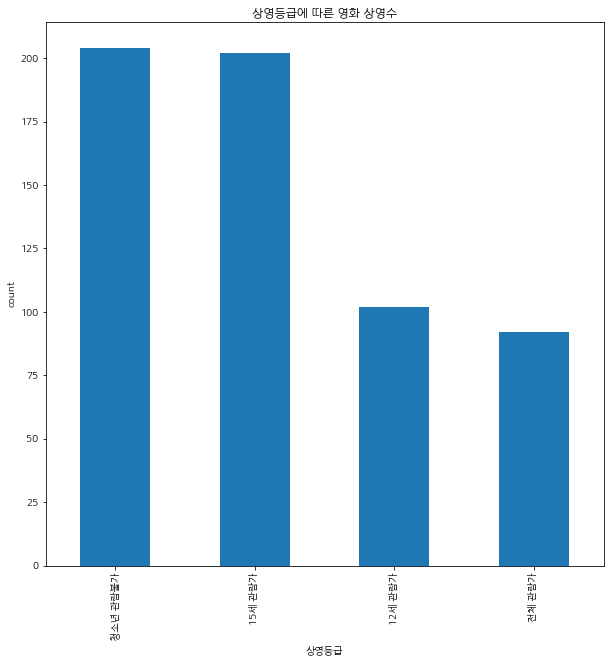

In [ ]:
train['screening_rat'].value_counts().plot(kind='bar')
plt.title('상영등급에 따른 영화 상영수')
plt.xlabel('상영등급')
plt.ylabel('count')

##### | 분석 결과
___
- 청소년 관람불가, 15세 관람가, 12세 관람가, 전체 관람가 순으로 영화상영수가  많다. 
- 청소년 관람불가, 15세 관람가 영화 수는 12세 관람가, 전체 관람가의 약 2배 수준이다.

### **2-1) 상영등급 별 관객수**
- 사용한 변수:  screening_rat, box_off_num

Text(0, 0.5, '관객수')

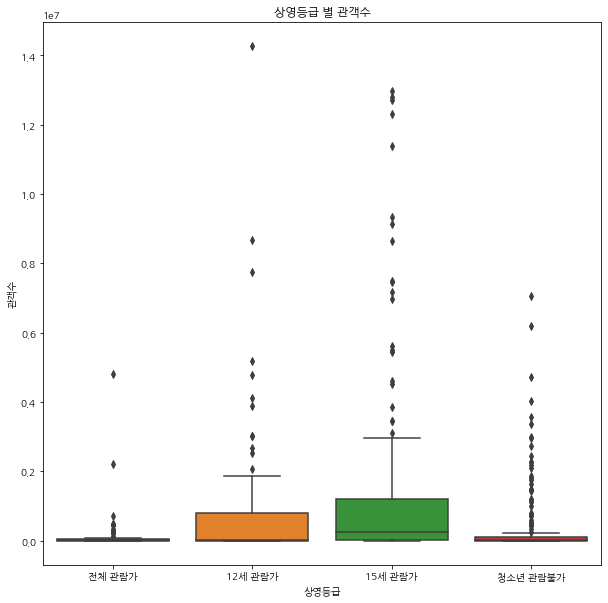

In [ ]:
ax=plt.subplots()
ordersr=['전체 관람가','12세 관람가','15세 관람가','청소년 관람불가']
ax=sns.boxplot(x='screening_rat',y='box_off_num',data=train,order=ordersr)
plt.title("상영등급 별 관객수")
plt.xlabel('상영등급')
plt.ylabel('관객수')

(0.0, 4000000.0)

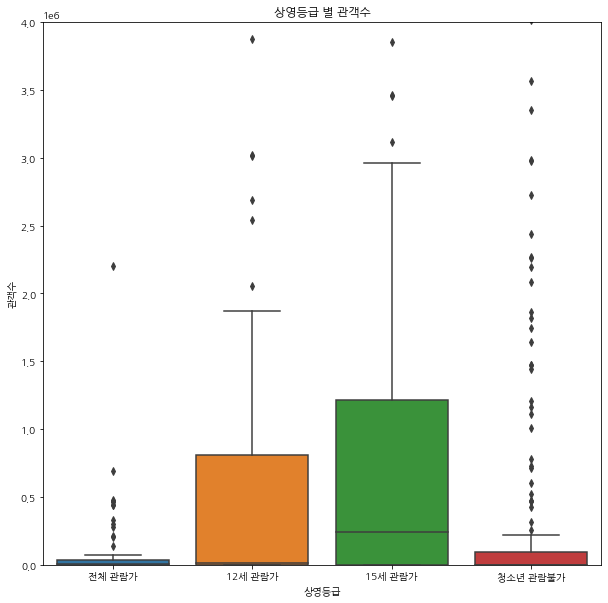

In [ ]:
ax=plt.subplots()
ax=sns.boxplot(x='screening_rat',y='box_off_num',data=train,order=ordersr)
plt.title("상영등급 별 관객수")
plt.xlabel('상영등급')
plt.ylabel('관객수')
plt.ylim(0,4000000) #ylim 조정해서 작은 값들의 그래프가 더 잘 보이게

##### | 분석 결과
___
- 15세 관람가, 12세 관람가, 청소년 관람불가, 전체 관람가 순으로 관객수가 많다. 
- 위의 상영등급별 영화상영수 분석과 비교했을 때  
  영화상영수가 가장 많은 등급은 청소년 관람불가 등급이었지만,  
  관객수가 가장 많은 등급은 15세 관람가로 나타났다. 

### **2-2) 상영등급 별 인기있는 장르**
- 사용한 변수: box_off_num, screening_rate, genre

Text(0, 0.5, '관객수')

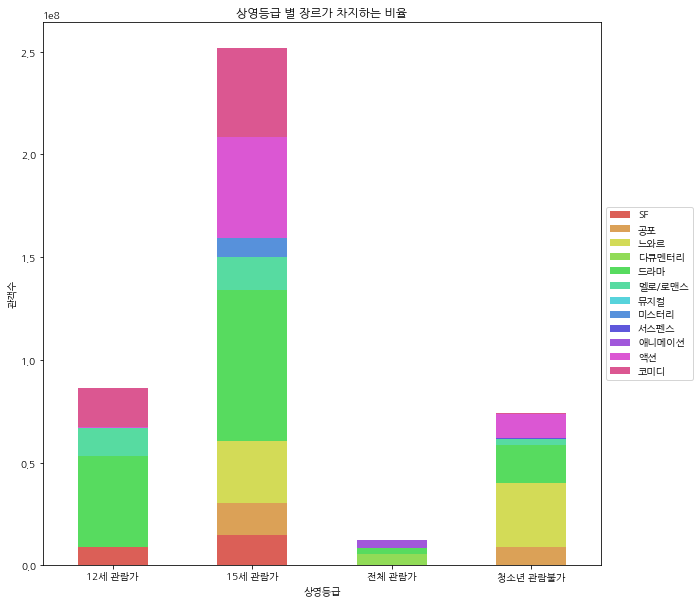

In [ ]:
order_g = train['genre'].unique() #genre 값들의 순서 정하고 색깔 겹치지 않게 지정
order_g = np.sort(order_g)
color_g= sns.color_palette('hls', len(order_g))
a=train.groupby(['screening_rat','genre']).sum()
a=pd.DataFrame(a.reset_index())
a = a.pivot(index='screening_rat', columns='genre', values='box_off_num')
a.plot.bar(stacked=True,color=color_g) #누적 막대그래프
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #legend 위치 조정
plt.xticks(rotation=0)
plt.title('상영등급 별 장르가 차지하는 비율')
plt.xlabel('상영등급')
plt.ylabel('관객수')

##### | 분석 결과
___
- 전체관람가에서는 다큐멘터리와 애니메이션 장르, 공통적으로 12세, 15세 관람가에서는 드라마 장르, 청소년 관람불가에서는 느와르 장르가 인기가 많다.

##**3) 개봉일 분석**

### **3-1) 개봉월에 따른 관객 수**
- 사용한 변수: release_time, box_off_num

In [ ]:
# release_time 날짜형으로 바꾸기
train['release_time']=pd.to_datetime(train['release_time'])

# release_month 달 추출
train['release_month']=train['release_time'].dt.month

In [ ]:
# seaborn 라이브러리로 그래프 그리기 전, 색깔 지정

## month 색깔 지정
color_m = sns.color_palette('hls', len(train['release_month'].unique()))

## genre 색깔 지정
order_g = train['genre'].unique()
order_g = np.sort(order_g) # 한글 순 정렬 (범례 순서와 같게)
color_g= sns.color_palette('hls', len(order_g))

Text(0, 0.5, '관객수')

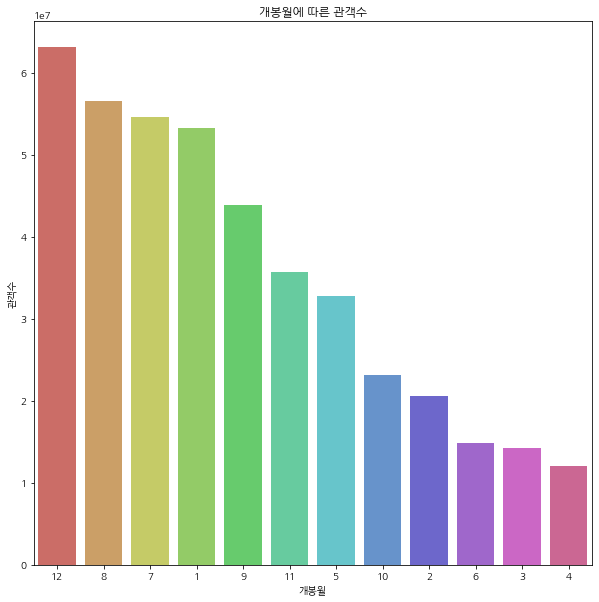

In [ ]:
# 개봉월에 따른 관객수를 바차트로 나타내기

train_mon = train[['release_month', 'box_off_num']].groupby('release_month').sum().sort_values('box_off_num', ascending=False).reset_index()
ax = sns.barplot(x='release_month', y='box_off_num', data=train_mon, palette=color_m, 
                 order = train_mon['release_month'].value_counts().index)
ax.set_title('개봉월에 따른 관객수')
ax.set_xlabel('개봉월')
ax.set_ylabel('관객수')

##### | 분석 결과
___
  1. 연말 기간인 12월
  2. 여름방학 기간인 7,8월
  3. 연초 기간인 1월
  4. 추석 기간인 9월  
  순으로 관객수가 많은 것으로 나타났다. 

### **3-2) 개봉시기에 따른 장르의 인기도 추이**
- 사용한 변수: release_month, genre, box_off_num

* 관객수가 많은 특정 개봉시기에 어떤 장르가 인기가 많은지 알아보고자 한다. 

>-'인기가 많다'의 척도는 관객수로 정한다.  
>-관객수가 많은 특정 개봉시기는 다음과 같다. 
  1. 연말 기간인 12월
  2. 여름방학 기간인 7,8월
  3. 연초 기간인 1월
  4. 추석 기간인 9월 

Text(0, 0.5, '관객수')

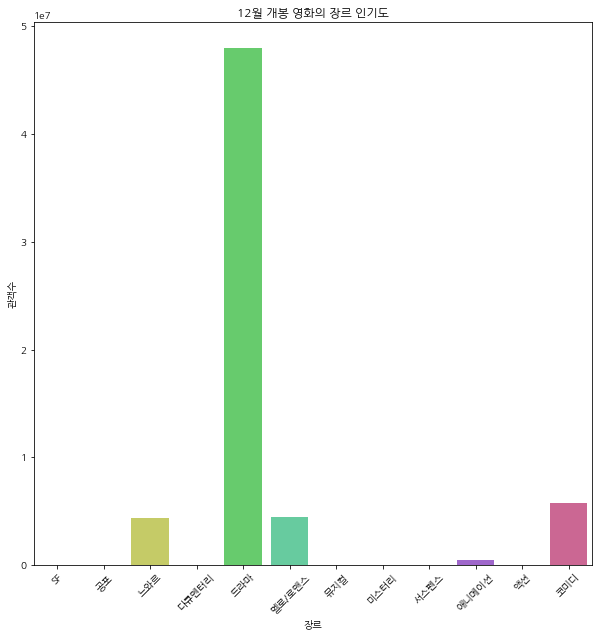

In [ ]:
## 월별로 장르의 인기도 살펴보기
# 연말 기간인 12월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon12 = train[train['release_month']==12][['title','genre', 'box_off_num']]
train_mon12_sum = train_mon12.groupby('genre').sum().reset_index()
train_mon12_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon12_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('12월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

##### | 분석 결과
___
* 연말 기간인 12월에 개봉된 영화에서 드라마 장르가 인기가 압도적으로 많다. 
* 느와르, 멜로/로맨스, 코미디 장르가 그 다음으로 인기도가 높았지만 대체적으로 낮은 편이다. 

Text(0, 0.5, '관객수')

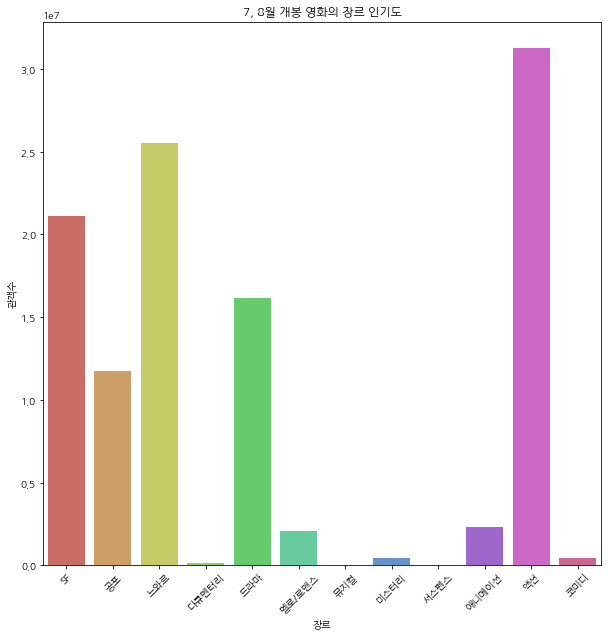

In [ ]:
## 월별로 장르의 인기도 살펴보기
# 여름방학 기간인 7, 8월에 개봉된 영화의 장르 인기도를 바차트로 나타내기

train_mon78 = train[(train['release_month']==7)|(train['release_month']==8)][['title','genre', 'box_off_num']]
train_mon78_sum = train_mon78.groupby('genre').sum().reset_index()
train_mon78_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon78_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('7, 8월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

##### | 분석 결과
___
* 여름방학 기간인 7,8월에 개봉된 영화에서 액션 장르가 인기가 가장 많다. 
* 느와르, SF, 드라마 장르가 그 다음으로 인기도가 높다. 

Text(0, 0.5, '관객수')

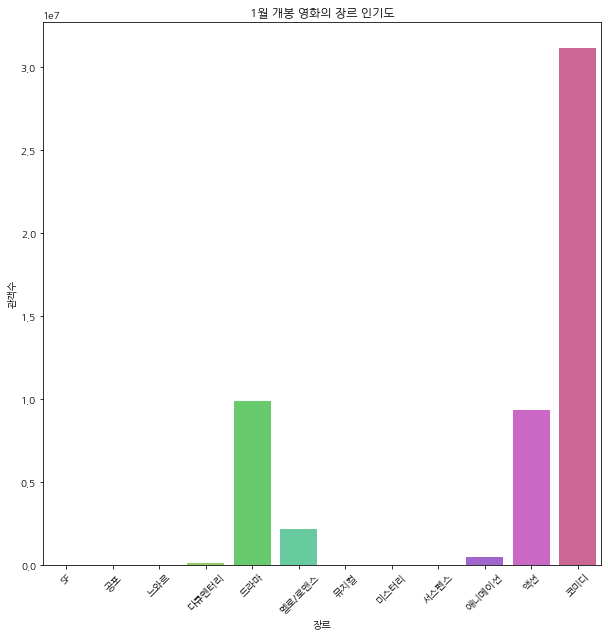

In [ ]:
# 월별로 장르의 인기도 살펴보기
## 설연휴 기간인 1월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon1 = train[train['release_month']==1][['title','genre', 'box_off_num']]
train_mon1_sum = train_mon1.groupby('genre').sum().reset_index()
train_mon1_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon1_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('1월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

##### | 분석 결과
___
* 연초 기간인 1월에 개봉된 영화에서 코미디 장르가 압도적으로 가장 인기가 많다.
* 드라마, 액션 장르가 그 다음으로 인기도가 높지만 대체로 낮은 편이다. 

Text(0, 0.5, '관객수')

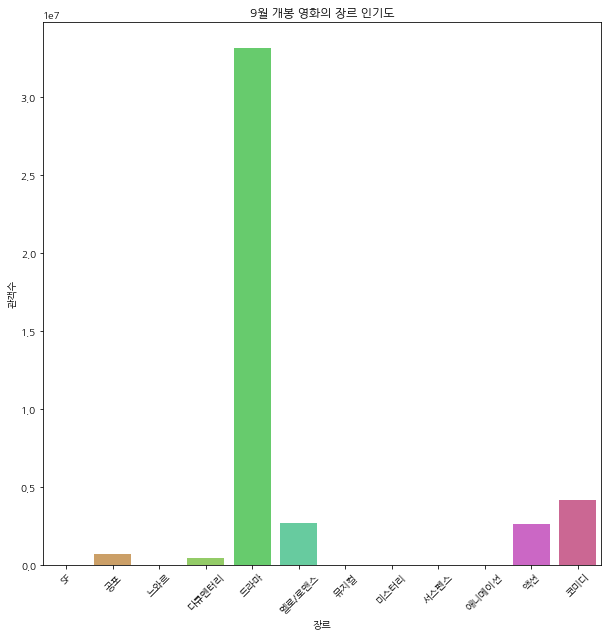

In [ ]:
# 월별로 장르의 인기도 살펴보기
## 추석연휴 기간인 9월에 개봉된 영화의 장르 인기로를 바차트로 나타내기

train_mon9 = train[train['release_month']==9][['title','genre', 'box_off_num']]
train_mon9_sum = train_mon9.groupby('genre').sum().reset_index()
train_mon9_sum.columns = ['genre', 'num_movies']

ax = plt.subplots()
ax = sns.barplot(x='genre', y='num_movies', data=train_mon9_sum, errwidth=0, order=order_g, palette=color_g)
plt.xticks(rotation=45)
ax.set_title('9월 개봉 영화의 장르 인기도')
ax.set_xlabel('장르')
ax.set_ylabel('관객수')

##### | 분석 결과
___
* 추석 기간인 9월에 개봉된 영화에서 드라마 장르가 압도적으로 가장 인기가 많다.
* 멜로/로맨스, 액션, 코미디가 그다음으로 인기도가 높았지만, 대체적으로 낮은 편이다.  

Text(0, 0.5, '관객수')

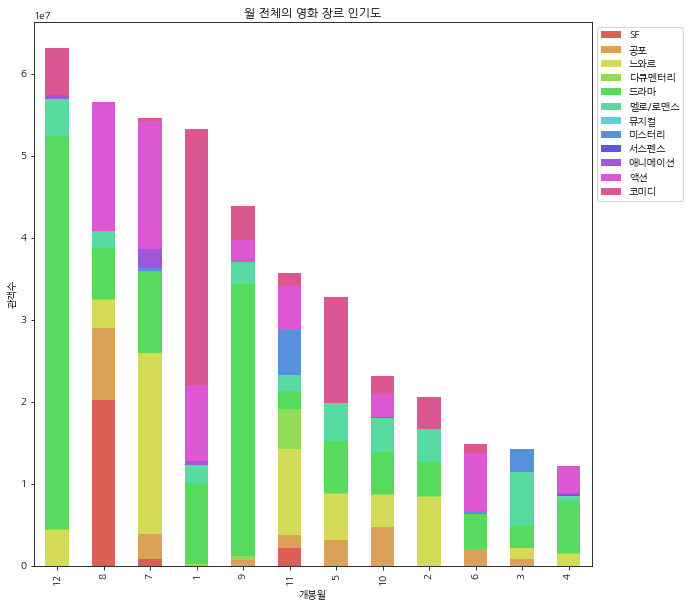

In [ ]:
# 월 전체의 장르 인기도를 한꺼번에 살펴보기
## 누적 바차트로 나타내기

train_mon_g = train.groupby(['release_month','genre'])['box_off_num'].sum().reset_index()

train_mon_g_p = train_mon_g.pivot(index='release_month', columns='genre', values='box_off_num') # 피벗화
train_mon_g_p = train_mon_g_p.loc[train_mon['release_month'].value_counts().index] # 관객수 많은 월 순서대로 정렬
train_mon_g_p.plot.bar(stacked=True, color=color_g) # 누적 막대그래프로
plt.legend(loc=2, bbox_to_anchor=(1, 1)) # 범례 위치
plt.title('월 전체의 영화 장르 인기도')
plt.xlabel('개봉월')
plt.ylabel('관객수')

##### | 분석 결과
___
* 월별로 따로 분석한 그래프의 결과와 같이 12월에 드라마, 7,8월에 액션, 1월에 코미디, 9월에 드라마 장르가 인기가 가장 많은 것을 한번에 확인할 수 있다.

### **3-3) 배급사의 개봉시기 분포**
- 사용한 변수: release_month, distributor

In [ ]:
# 영화상영수가 많은 상위5개 배급사의 개봉시기 분포 살펴보기
## 배급사별로 개봉시기 분포 나타내기 

# 영화상영수 많은 상위5 배급사 확인
train_dist_top = train['distributor'].value_counts().head(5) 

# 그룹화
train_dist_gr = train.groupby(['distributor', 'release_month'])['title'].count().reset_index() 
train_dist_gr.columns = ['distributor', 'release_month', 'num_movies']

# 그룹화 중 상위5배급사에 해당하는 행추출
train_dist_top_gr = train_dist_gr[train_dist_gr['distributor'].isin(train_dist_top.index)].copy() 

In [ ]:
# 상위5개 배급사 데이터셋 따로 추출
top1 = train_dist_top_gr[train_dist_top_gr['distributor']=='CJ 엔터테인먼트']
top2 = train_dist_top_gr[train_dist_top_gr['distributor']=='롯데엔터테인먼트']
top3 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)NEW']
top4 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)마운틴픽쳐스']
top5 = train_dist_top_gr[train_dist_top_gr['distributor']=='(주)쇼박스']

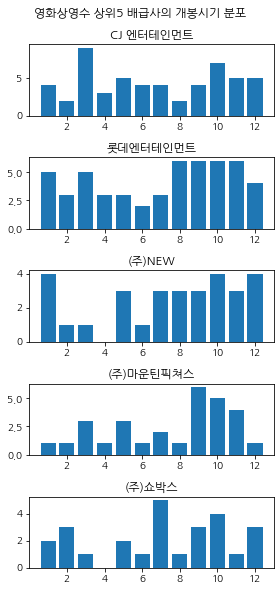

In [ ]:
# 한면에 그래프 그리기
fig = plt.figure(figsize=(4,8))

ax1 = fig.add_subplot(5,1,1)
ax2 = fig.add_subplot(5,1,2)
ax3 = fig.add_subplot(5,1,3)
ax4 = fig.add_subplot(5,1,4)
ax5 = fig.add_subplot(5,1,5)

ax1.bar(top1['release_month'], top1['num_movies'])
ax1.set_title('CJ 엔터테인먼트')

ax2.bar(top2['release_month'], top2['num_movies'])
ax2.set_title('롯데엔터테인먼트')

ax3.bar(top3['release_month'], top3['num_movies'])
ax3.set_title('(주)NEW')

ax4.bar(top4['release_month'], top4['num_movies'])
ax4.set_title('(주)마운틴픽쳐스')

ax5.bar(top5['release_month'], top5['num_movies'])
ax5.set_title('(주)쇼박스')

fig.suptitle('영화상영수 상위5 배급사의 개봉시기 분포', y=1.02)

fig.tight_layout()

##### | 분석 결과
___
* 영화상영수가 많은 배급사의 경우,  
  상반기, 하반기 달에 위로 볼록하고, 중앙이 아래로 패인 쌍봉형태의 그래프를 보인다. 
* 배급사 전반적으로 상반기보다 하반기에 영화상영수가 더 많다. 

In [ ]:
# 영화상영수가 1개인 배급사의 개봉시기 분포 살펴보기
## 배급사 전체의 개봉시기 분포를 바차트로 나타내기

# 영화상영수가 1개인 배급사 확인
train_dist_count = train['distributor'].value_counts().reset_index()
train_dist_count.columns = ['distributor', 'num_movies']
train_dist_count[train_dist_count['num_movies']==1].count()

distributor    102
num_movies     102
dtype: int64

Text(0, 0.5, '영화상영수')

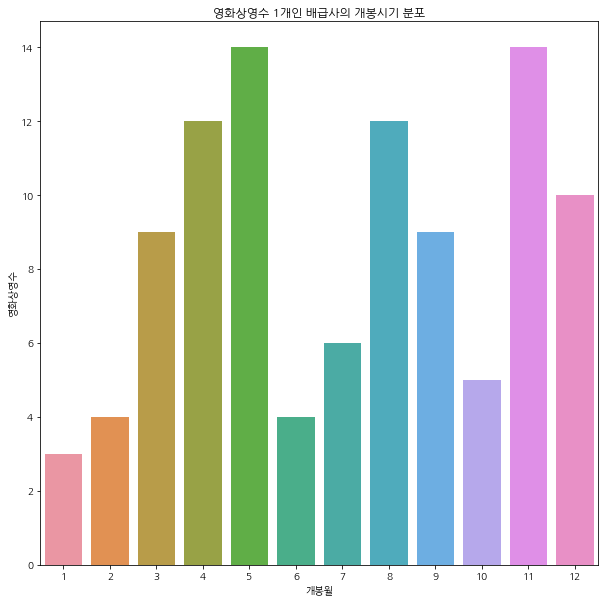

In [ ]:
# 영화상영수가 1개인 배급사 데이터셋 따로 추출
train_dist_only1 = train['distributor'].value_counts().tail(102)
train_dist_only1

# 그룹화
train_dist_g = train.groupby(['distributor', 'release_month'])['title'].count().reset_index()
train_dist_g.columns = ['distributor', 'release_month', 'num_movies']

# 그룹화 중 상위5배급사에 해당하는 행추출
train_dist_only1_g = train_dist_g[train_dist_g['distributor'].isin(train_dist_only1.index)].copy()

# 그래프
a = train_dist_only1_g.groupby('release_month').sum().reset_index()
ax = sns.barplot(x='release_month', y='num_movies', data=a)
ax.set_title('영화상영수 1개인 배급사의 개봉시기 분포')
ax.set_xlabel('개봉월')
ax.set_ylabel('영화상영수')

##### | 분석 결과
___
* 영화상영수가 1개인 배급사의 경우,  
  영화상영수가 많은 배급사와 마찬가지로,  
  상반기, 하반기 달에 위로 볼록하고, 중앙이 아래로 패인 쌍봉형태의 그래프를 보인다.
* 영화상영수가 1개인 배급사의 경우,  
  영화상영수가 많은 배급사와 달리,  
  상반기보다 하반기에 영화상영수가 더 많다고 할 수 없다.

##**4) 스텝수 분석**

### **4-1) 주연배우수 vs 스텝수**
- 사용한 변수: num_actor, num_staff

In [ ]:
train['num_actor'].describe()

count    600.000000
mean       3.706667
std        2.446889
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       25.000000
Name: num_actor, dtype: float64

Text(0, 0.5, '스텝수')

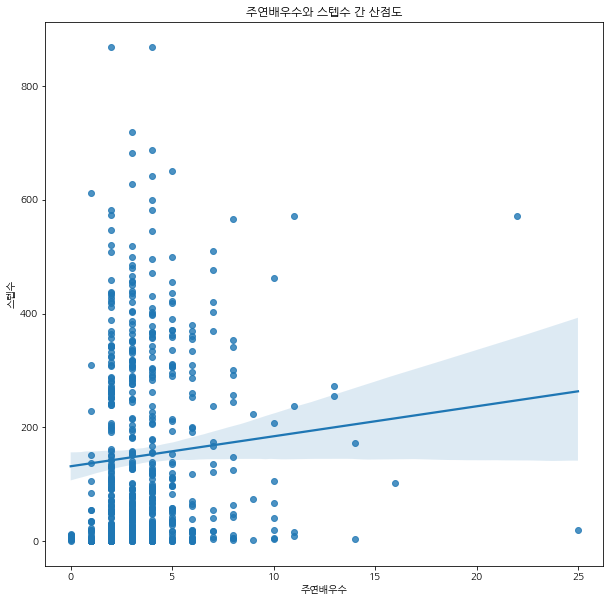

In [ ]:
ax=plt.subplots()
ax=sns.regplot(x='num_actor',y='num_staff',data=train)
ax.set_title('주연배우수와 스텝수 간 산점도')
ax.set_xlabel('주연배우수')
ax.set_ylabel('스텝수')

In [ ]:
#상관관계
train[['num_actor','num_staff']].corr()

,num_actor,num_staff
num_actor,1.000000,0.077871
num_staff,0.077871,1.000000


##### | 분석 결과
___
*   주연배우수와 스텝수는 약한 양의 상관관계를 보이기는 하나 회귀선에 벗어나는 오차들이 많다.
*   상관계수가 0.077871로 매우 작아 경향성 찾기 어렵다.



###**4-2) 감독 전작 흥행도(유명도) vs 스텝수**
- 사용한 변수: director, dir_prev_bfnum

In [ ]:
#train['director'].unique()

In [ ]:
train['dir_prev_bfnum'].describe()

count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64

In [8]:
#유명도 변수 생성
train['유명도']=''
for i in range(len(train)):
  if train['dir_prev_bfnum'][i]==0: 
    train['유명도'][i]='1'
  elif train['dir_prev_bfnum'][i]<100000:
    train['유명도'][i]='2'
  elif train['dir_prev_bfnum'][i]<500000:
    train['유명도'][i]='3'
  elif train['dir_prev_bfnum'][i]<1000000: 
    train['유명도'][i]='4'
  else:
    train['유명도'][i]='5'

Text(0, 0.5, '스텝수')

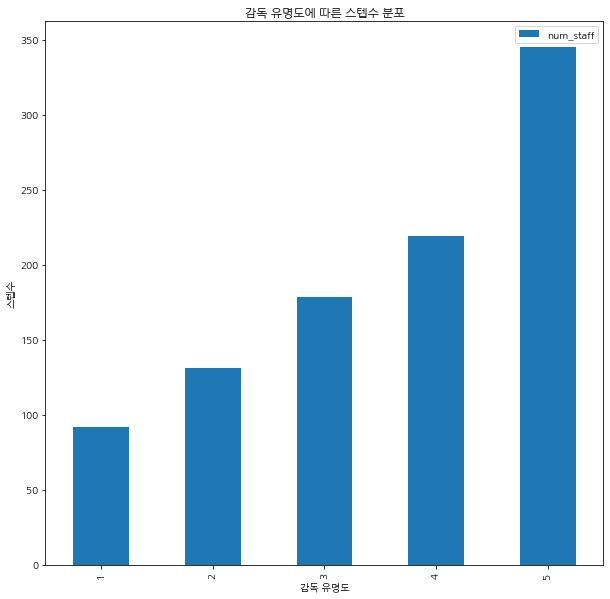

In [ ]:
train[['num_staff']].groupby(train['유명도']).mean().plot(kind='bar')
plt.title("감독 유명도에 따른 스텝수 분포")
plt.xlabel("감독 유명도")
plt.ylabel("스텝수")

In [9]:
aaaa = train[['num_staff']].groupby(train['유명도']).mean().reset_index()
aaaa.columns = ['유명도', '평균스텝수']
aaaa

,유명도,평균스텝수
0,1,91.990909
1,2,131.400000
2,3,178.804348
3,4,219.102564
4,5,345.122222


In [14]:
#상관관계 검정 (감독의 유명도:범주형 변수/스텝수:연속형 변수) => 비모수 검정 (스피어만)
pg.corr(aaaa.유명도.astype(int), aaaa.평균스텝수, method="spearman")

,n,r,CI95%,p-val,power
spearman,5,1.0,"[1.0, 1.0]",1.404265e-24,1.0


##### | 분석 결과
___
*   감독 유명도별로 그룹화하여 살펴본 결과, 스텝 수는 감독의 유명도와 비례하여 증가하는 경향성을 보인다.
* 감독 유명도와 스텝 수 간 상관계수가 1로, 양의 상관관계가 매우 높게 나타난다.

##**5) 배급사 분석**

### **5-1) 배급사별 장르 추이: 상위 6개**
- 사용한 변수: distributor, genre, num_movies

In [ ]:
#영화를 가장 많이 제작하는 배급사 top10
train['distributor'].value_counts().sort_values(ascending=False)[:10]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

In [ ]:
#배급사별 자료 정렬
train_top6 = train['distributor'].value_counts().head(6)

train_dt_genre = train.groupby(['distributor', 'genre'])['title'].count().reset_index()
train_dt_genre.columns = ['distributor', 'genre', 'num_movies']

train_distributor_genre = train_dt_genre[train_dt_genre['distributor'].isin(train_top6.index)].copy() #상위 배급사 자료만

In [ ]:
import matplotlib.patches as mpt
import matplotlib.colors as mcl
import matplotlib.pyplot as plt

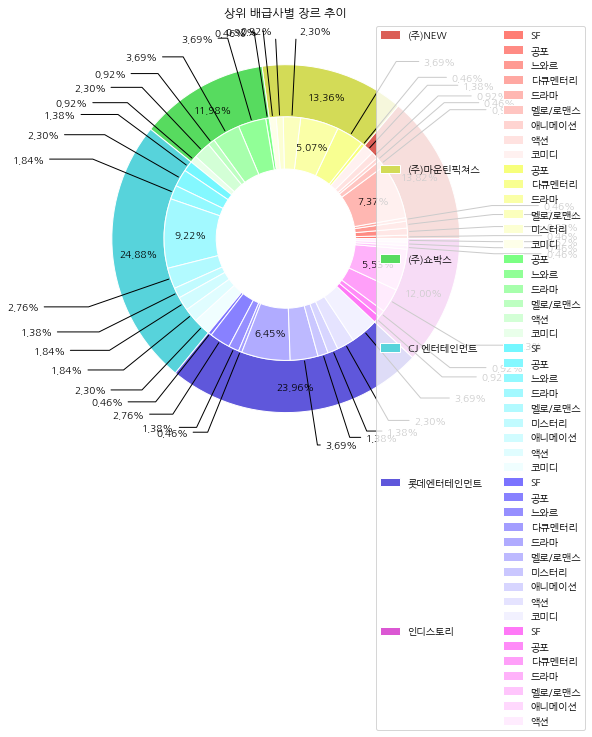

In [ ]:
#방법1 - 도넛 그래프

freq_col = 'num_movies' ## 빈도수 칼럼
outer_col = 'distributor' ## 상위 그룹 칼럼
inner_col = 'genre' ## 하위 그룹 칼럼
 
size = 0.3 ## 바깥쪽, 안쪽 도넛 조각 조각의 반지름 비율을 0.3으로 한다.
threshold = 4 ## 상한선 백분율
 
color = sns.color_palette('hls',len(train_distributor_genre[outer_col].unique())) ## 바깥쪽 도넛의 색상설정
 
summary = train_distributor_genre.groupby(outer_col)[freq_col].sum().reset_index() ## 지역별로 득표수를 집계한다.
outer_data = summary[freq_col] ## 바깥쪽 도넛에 해당하는 데이터
inner_data = [] ## 안쪽 도넛에 대응하는 데이터
for s in summary[outer_col]:
    inner_data += list(train_distributor_genre.query('{0}==@s'.format(outer_col))[freq_col])
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(outer_data,
             radius=1,
             colors=color,
             wedgeprops=dict(width=size,edgecolor='w'))
 
## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data) ## 바깥쪽 빈도수의 총합
 
sum_pct = 0 ## 백분율 초기값
 
for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2 ## 각1, 각2
    out_r = out_pie[0][i].r ## 원의 반지름
    
    x = ((2*out_r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*out_r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{outer_data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center')
 
outer_color = [] ## 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor()) ## 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color] ## rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0],x[1],1) for x in outer_color_hsv] ## 색상 채도만 가져오고 명도는 1로 고정한다.
 
inner_color = [] ## 안쪽 도넛 조각의 색상을 담는 리스트
for i, g in enumerate(summary[outer_col]):
    num_sub_group = len(train_distributor_genre.query('{0}==@g'.format(outer_col))) ## 하위 그룹 개수
    jump = outer_color_hsv[i][1]/(num_sub_group+1) ## 채도 등분점 간격
    temp_list = []
    temp_s = np.arange(0,outer_color_hsv[i][1],jump) 
    temp_s = temp_s[1:] ## 채도 등분점
    for t in temp_s:
        h = outer_color_hsv[i][0] ## 색상
        s = t ## 채도
        v = outer_color_hsv[i][2] ## 명도
        temp_list.append((h,s,v))
    inner_color += temp_list[::-1] ## 순서를 바꿈
    
inner_color = [mcl.hsv_to_rgb(x) for x in inner_color] #3 hsv를 다시 rgb로 바꾼다.
 
## 안쪽 도넛 차트 출력
inner_pie = ax.pie(inner_data,
       radius=1-size,
       colors=inner_color,
       wedgeprops=dict(width=size,edgecolor='w'))
 
## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
inner_sum_pct = 0 ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2 ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r ## 안쪽 도넛의 반지름
    
    x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        text = f'{inner_data[i]/total*100:.2f}%' ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100-inner_sum_pct:.2f}%'
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = out_r*np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = out_r*np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=((out_r-size)*x, (out_r-size)*y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center')
 
## 범례
## 범례는 2줄로 만든다. 왼쪽 줄에는 상위 그룹을 표시하고 오른쪽 줄에는 하위 그룹을 표시한다.
inner_pie_index = -1 ## 안쪽 도넛 차트의 데이터에 접근할 인덱스 초기값
right_legend_patches = [] ## 오른쪽 범례 칼럼에 들어가는 요소
left_legend_patches = [] ## 왼쪽 범례 칼럼에 들어가는 요소
right_labels = [] ## 오른쪽 범례 칼럼에 들어가는 라벨
left_labels = [] ## 왼쪽 범례 칼러에 들어가는 라벨
for i in range(len(outer_data)):
    left_legend_patches.append(out_pie[0][i])
    
    outer_label = summary[outer_col][i] ## 바깥쪽 도넛 차트 라벨
 
    left_labels.append(outer_label)
    temp_data = train_distributor_genre.query('{0}==@outer_label'.format(outer_col)) ## 바깥쪽 라벨에 대응하는 안쪽 도넛 데이터
    temp_data = temp_data.reset_index(drop=True)
    
    temp_number = len(temp_data)-1
    
    ## 오른쪽 범례 개수와 맞추기 위해 빈 범례를 만듬
    for k in range(temp_number):
        rect = mpt.Rectangle((0,0),1,1.1,facecolor='None')
        left_legend_patches.append(rect)
        left_labels.append('')
    
    ## 오른쪽 범례 칼럼을 만든다.
    for j in range(len(temp_data)):
        inner_pie_index += 1
        
        right_legend_patches.append(inner_pie[0][inner_pie_index])
        right_labels.append(temp_data[inner_col][j])
        
    ## 범례 요소와 라벨을 합친다.
    legend_patches = left_legend_patches+right_legend_patches
    labels = left_labels + right_labels
        
## 범례 출력
plt.legend(legend_patches,
           labels,
           ncol=2,
           loc='upper right',
           handleheight=1, ## 범례 줄 맞춤
           labelspacing=0.5, ## 범례 줄 간격
           bbox_to_anchor=(1.2,1))

ax.set_title("상위 배급사별 장르 추이")
plt.show()

Text(0.5, 0.98, '상위 배급사별 장르 추이')

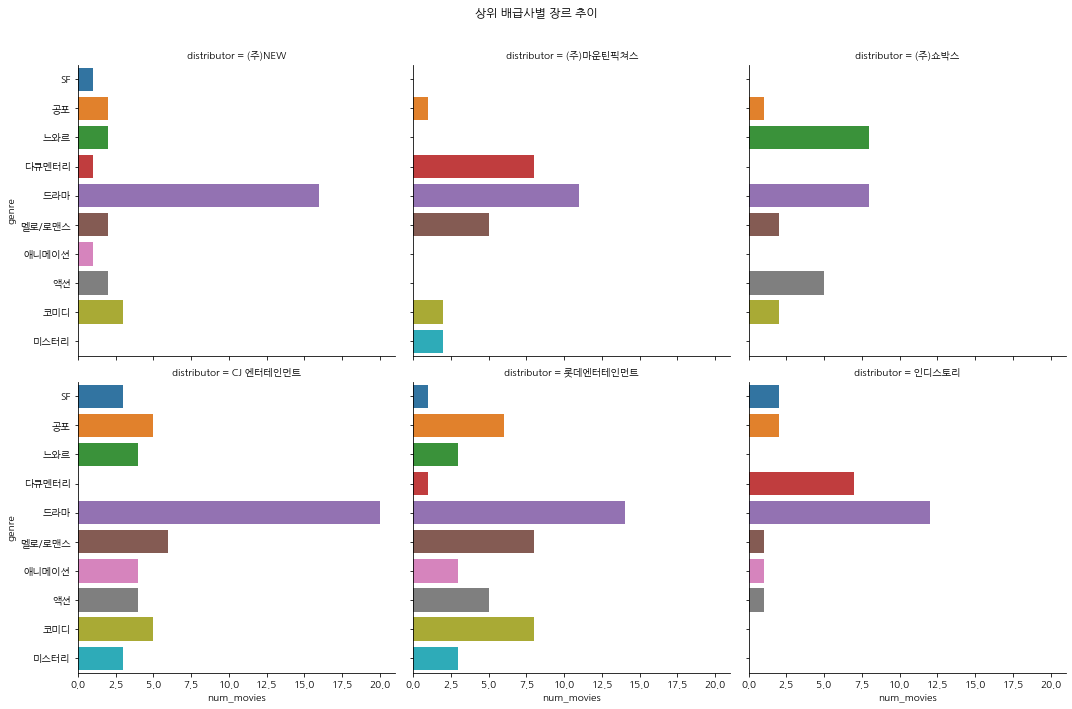

In [ ]:
#방법2 - 배급사별 막대 그래프
ax = sns.catplot(data=train_distributor_genre, x='num_movies', y='genre', kind='bar', col='distributor', col_wrap=3)
ax.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
ax.fig.suptitle('상위 배급사별 장르 추이')

##### | 분석 결과
___
*   도넛 그래프를 통해 상위 6개 배급사 간의 점유율과 각 배급사의 영화 장르 비율을 볼 수 있다.
*   배급사별 영화 장르 비율은 막대 그래프를 통해 더 자세히 확인할 수 있는데, 전체적으로 드라마 장르가 우세한 경향을 보이고 SF, 미스터리 등의 장르가 약세인 것을 관찰할 수 있다.


### **5-2) 배급사별 장르 추이: 하위 15개 합**
- 사용한 변수: distributor,genre, num_movies

In [ ]:
#영화를 가장 적게 제작하는 배급사 top15
train['distributor'].value_counts().sort_values(ascending=True)[:15]

이달투            1
(주)씨엠닉스        1
팜코리아미디어        1
(주)로드하우스       1
미라클 필름         1
위드시네마          1
더 피플           1
인피니티엔터테인먼트     1
쟈비스미디어         1
에이블엔터테인먼트      1
(주)이스트스카이필름    1
(주)JK필름        1
사람과 사람들        1
(주)고앤고 필름      1
오퍼스픽쳐스         1
Name: distributor, dtype: int64

In [ ]:
#배급사별 자료 정렬
train_bottom15 = train['distributor'].value_counts().tail(15)

train_dt_genre2 = train.groupby(['distributor', 'genre'])['title'].count().reset_index()
train_dt_genre2.columns = ['distributor', 'genre', 'num_movies']

train_distributor_genre2 = train_dt_genre2[train_dt_genre2['distributor'].isin(train_bottom15.index)].copy() #하위 배급사 자료만

train_distributor_genre2 = pd.DataFrame(train_distributor_genre2.groupby(['genre'])['num_movies'].sum())
train_distributor_genre2

,num_movies
genre,
공포,2
느와르,2
다큐멘터리,3
드라마,5
멜로/로맨스,1
미스터리,1
애니메이션,1


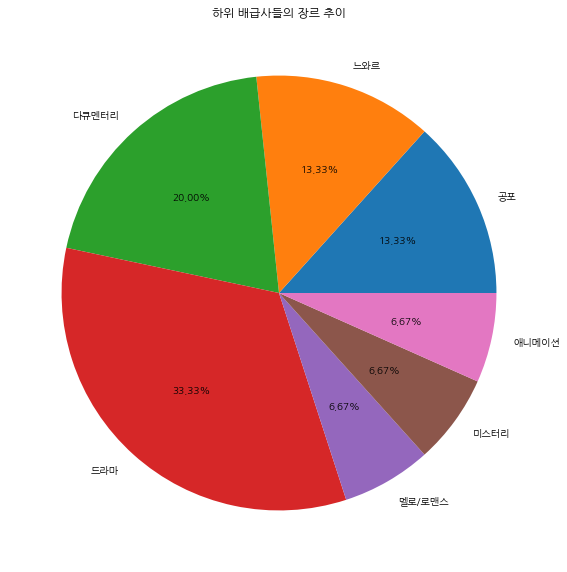

In [ ]:
#파이차트 그리기
ratio = train_distributor_genre2['num_movies']
labels = train_distributor_genre2.index

plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.title('하위 배급사들의 장르 추이')
plt.show()

##### | 분석 결과
___
*   영화 수가 적은 하위 배급사들은 배급사별로 영화를 한 편 씩만 상영하였기에 이들을 합쳐 하위 배급사 전체의 장르 수를 비교하였다.
*   하위 배급사 역시 드라마 장르를 가장 많이 상영하였다.
*   다만, 상위 배급사와는 다르게 다큐멘터리 장르가 상위권을 차지하고 멜로/로맨스 장르가 하위권을 차지한 것을 통해 상위 배급사와 하위 배급사의 경향성이 다름을 확인할 수 있다.

### **5-3) 배급사 점유율과 관객수 비교**
- 사용한 변수: distributor, box_off_num

In [ ]:
movie_count_by_dist = pd.DataFrame(train['distributor'].value_counts())
movie_count_by_dist

,distributor
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
OAL(올),1
(주)에이원 엔터테인먼트,1
(주)콘텐츠 윙,1
위더스필름,1


In [ ]:
box_num_by_dist = pd.DataFrame(train.groupby(['distributor'])['box_off_num'].sum())
box_num_by_dist

,box_off_num
distributor,
(주) 브릿지웍스,10795
(주) 액티버스엔터테인먼트,1220
(주) 영화사조제,67718
(주) 영화제작전원사,139540
(주) 케이알씨지,14382
...,...
필름라인,5100
하준사,600
한국YWCA연합회,71


In [ ]:
dist_box = pd.concat([movie_count_by_dist,box_num_by_dist],axis=1)
dist_box

,distributor,box_off_num
CJ 엔터테인먼트,54,116788093
롯데엔터테인먼트,52,64383745
(주)NEW,30,65532145
(주)마운틴픽쳐스,29,937924
(주)쇼박스,26,88053064
...,...,...
OAL(올),1,497994
(주)에이원 엔터테인먼트,1,53235
(주)콘텐츠 윙,1,1079
위더스필름,1,90


Text(0, 0.5, '관객수')

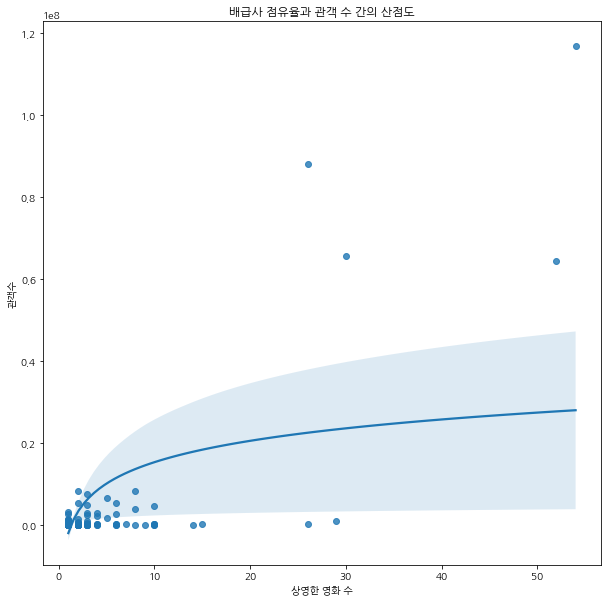

In [ ]:
ax = plt.subplots()
ax = sns.regplot(dist_box['distributor'],dist_box['box_off_num'],logx=True)
ax.set_title('배급사 점유율과 관객 수 간의 산점도')
ax.set_xlabel('상영한 영화 수')
ax.set_ylabel('관객수')

In [ ]:
dist_box[['distributor', 'box_off_num']].corr()

,distributor,box_off_num
distributor,1.000000,0.808073
box_off_num,0.808073,1.000000


##### | 분석 결과
___
*   배급사 점유율과 배급사별 전체 관객 수의 산점도를 보면, 전체적으로 우상향임을 확인할 수 있다.
*   전체적으로 자료가 좌측 하단에 모여있는 경향성을 보이지만, 상관계수가 0.808로 작지 않아 배급사 점유율과 배급사별 관객 수에는 유의미한 관계가 있다고 볼 수 있다.